In [46]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version은 코랩 명령입니다.
    %tensorflow_version 2.x
except Exception:
    pass

# 이 노트북은 텐서플로 ≥2.4이 필요합니다
# 2.x 버전은 대부분 동일한 결과를 만들지만 몇 가지 버그가 있습니다.
import tensorflow as tf
from tensorflow import keras

# 공통 모듈 임포트
import numpy as np
import pandas as pd

import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)
tf.random.set_seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "CNN"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

import warnings
warnings.filterwarnings(action='ignore')

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
    IS_COLAB = True
except Exception:
    IS_COLAB = False

if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. CNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")

import glob

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
model = keras.Sequential()

# 32는 필터(커널)의 개수
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same',
                              input_shape=(28,28,1)))

model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

# Dense 전에는 1차원으로 만드는 작업이 필요해서 1차원 layer 생성
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))

# Dropout은 사용할 뉴런을 랜덤하게 추출하기 위한 레이어
# 제거할 비율을 설정.
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

#

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

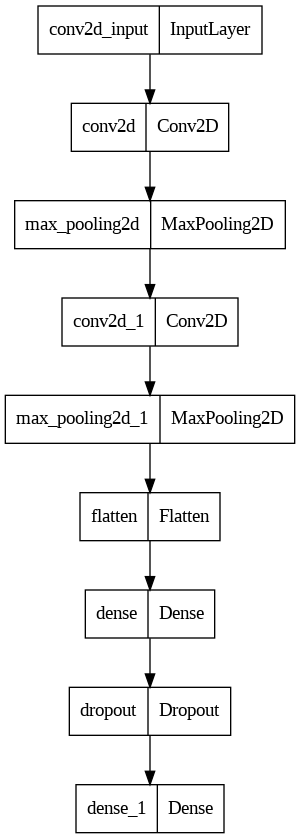

In [4]:
keras.utils.plot_model(model)

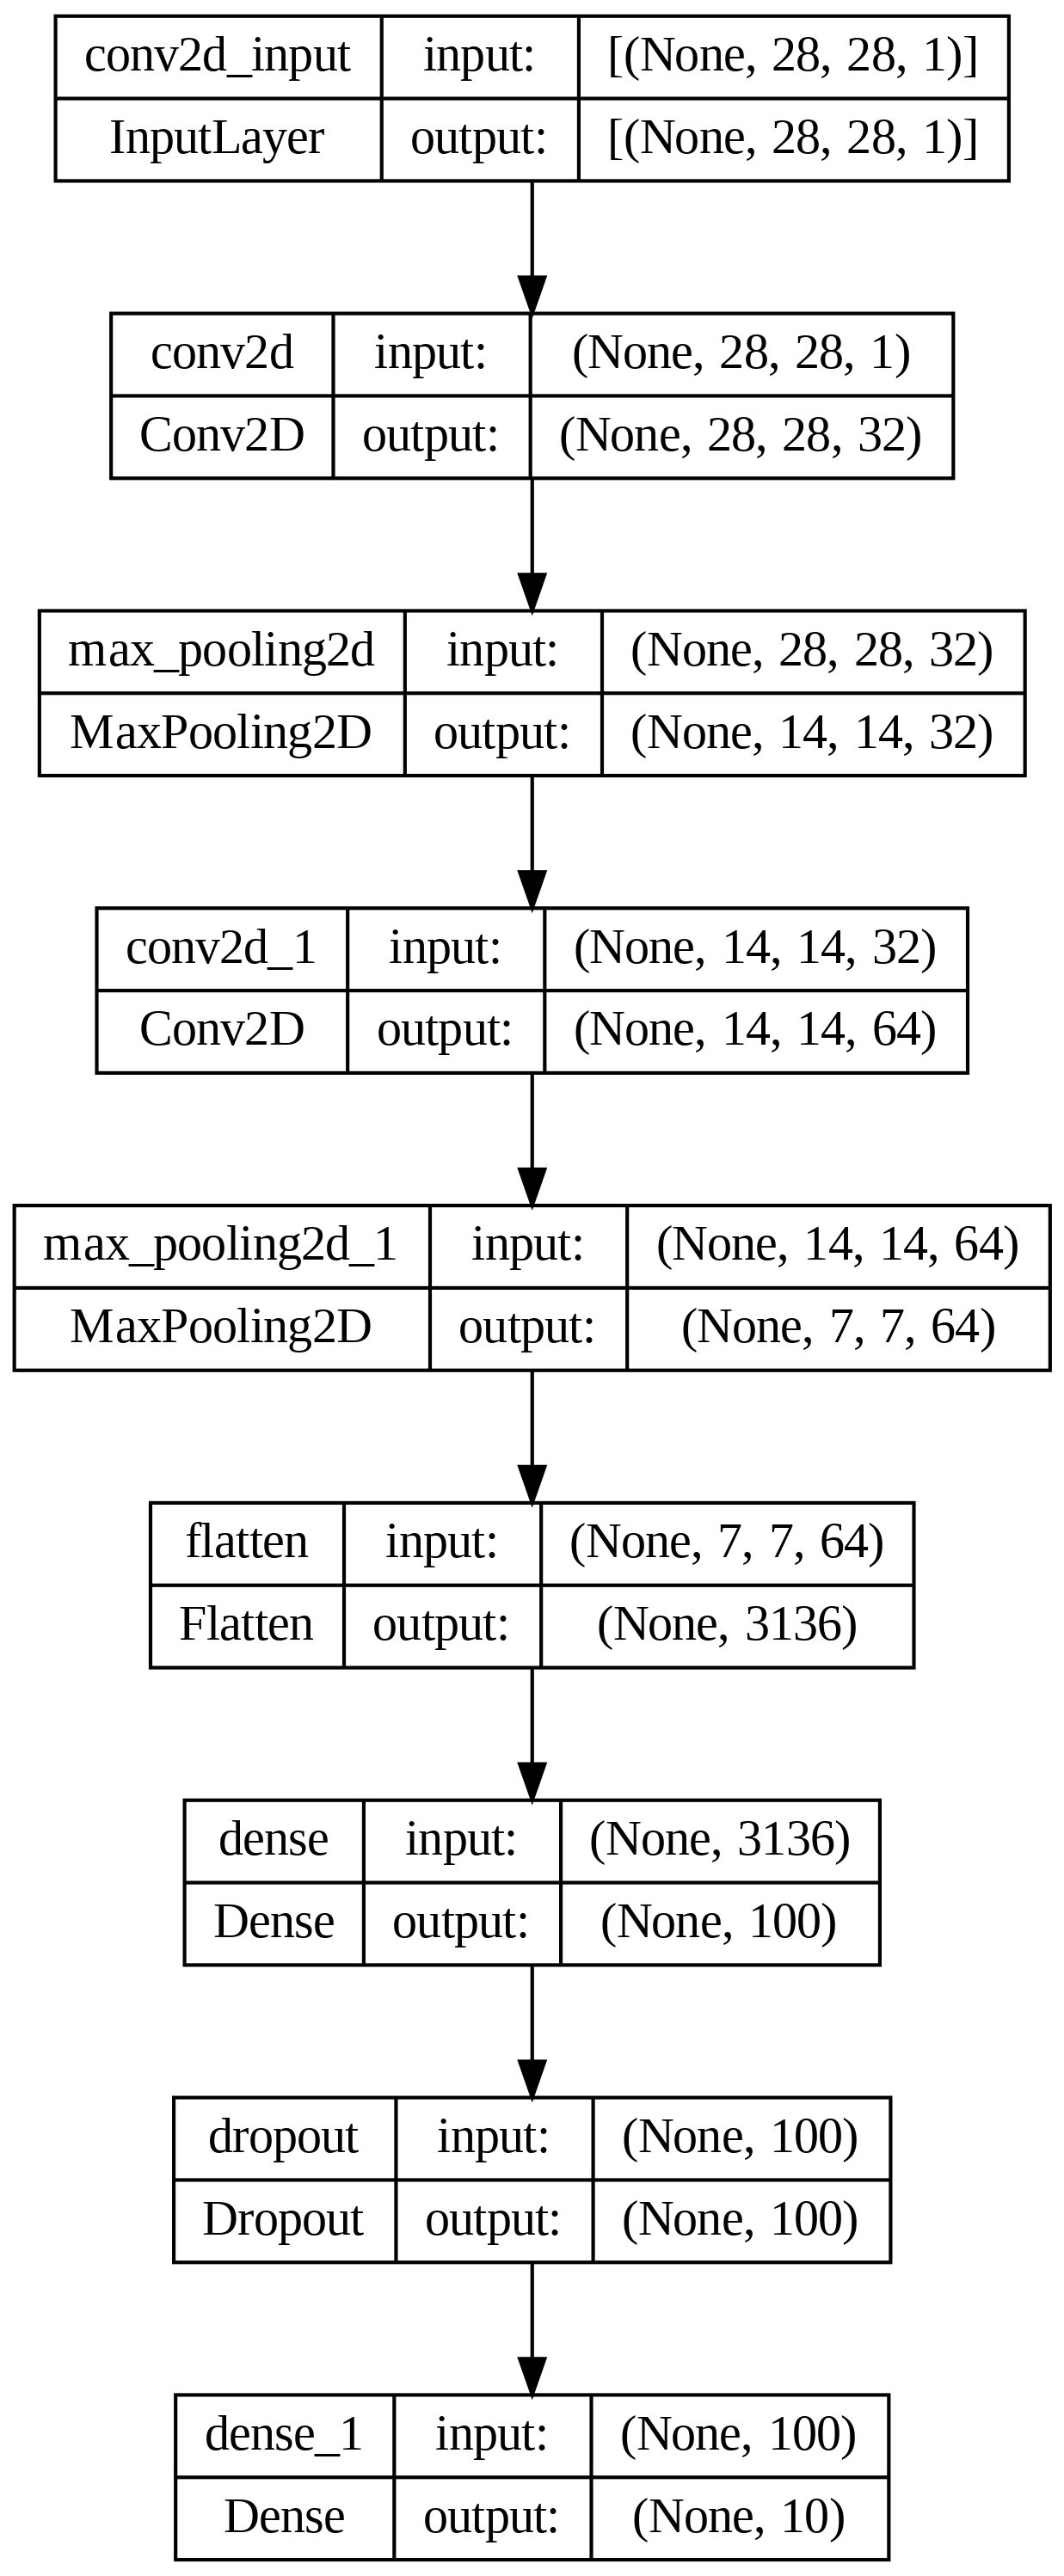

In [5]:
keras.utils.plot_model(model, show_shapes=True, to_file='cnn-architecture.png', dpi=300)

In [6]:
# 컴파일 최적화 함수 adam
# loss는 손실 함수
# metrics는 평가 지표
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

# callback
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/20
1500/1500 [==============================] - 20s 7ms/step - loss: 0.5317 - accuracy: 0.8107 - val_loss: 0.3331 - val_accuracy: 0.8776
Epoch 2/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3615 - accuracy: 0.8705 - val_loss: 0.2879 - val_accuracy: 0.8937
Epoch 3/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3137 - accuracy: 0.8863 - val_loss: 0.2659 - val_accuracy: 0.9008
Epoch 4/20
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2795 - accuracy: 0.8987 - val_loss: 0.2498 - val_accuracy: 0.9093
Epoch 5/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2511 - accuracy: 0.9075 - val_loss: 0.2427 - val_accuracy: 0.9090
Epoch 6/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2327 - accuracy: 0.9127 - val_loss: 0.2227 - val_accuracy: 0.9183
Epoch 7/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2136 - accuracy: 0.9216 - val_loss: 0.2291 - val_accur

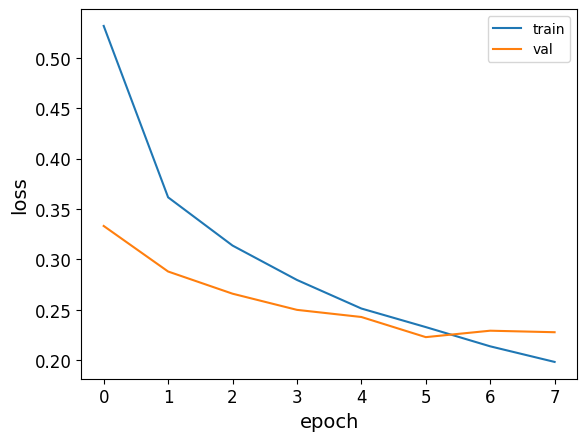

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [8]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.2227 - accuracy: 0.9183


[0.2227238416671753, 0.9182500243186951]

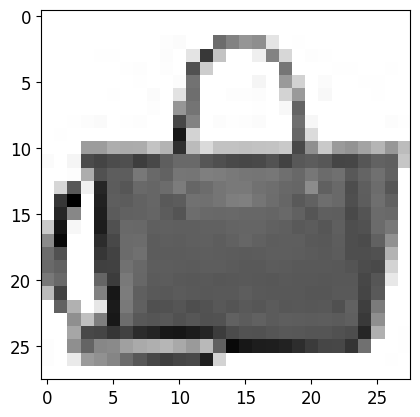

In [9]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [10]:
model.save('best-cnn-model.h5')

In [16]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 236ms/step
[[3.7397038e-18 1.0243503e-24 1.5814558e-18 2.8385123e-18 6.3796556e-17
  3.0301350e-17 2.5136243e-16 7.0129914e-17 1.0000000e+00 9.8900874e-18]]


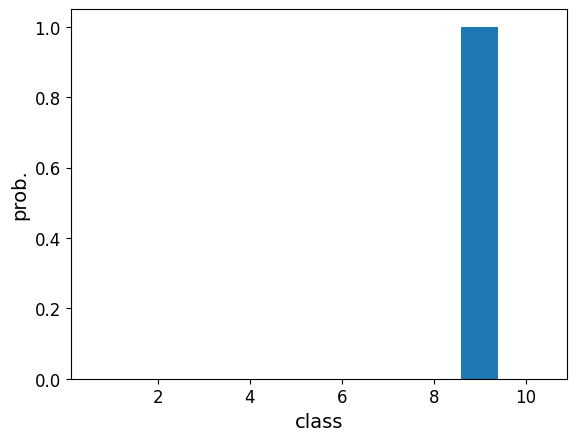

In [17]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [18]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [19]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [20]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [21]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 3ms/step - loss: 0.2476 - accuracy: 0.9112


[0.24760696291923523, 0.9111999869346619]

In [22]:
model.save('best-cnn-model.h5')

In [23]:
model = keras.models.load_model('best-cnn-model.h5')

In [24]:
model.layers

In [28]:
conv = model.layers[0]
# 3 * 3은 커널의 사이즈, 1은 채널의 개수, 32는 커널의 개수

print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [27]:
conv_weights = conv.weights[0].numpy()

print(conv_weights.mean(), conv_weights.std())

-0.009991709 0.2106523


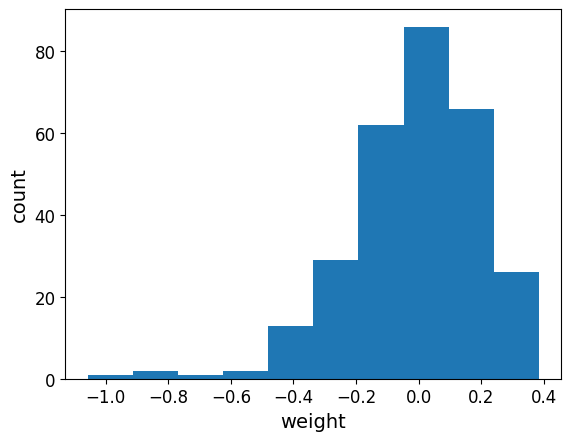

In [15]:
import matplotlib.pyplot as plt

plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

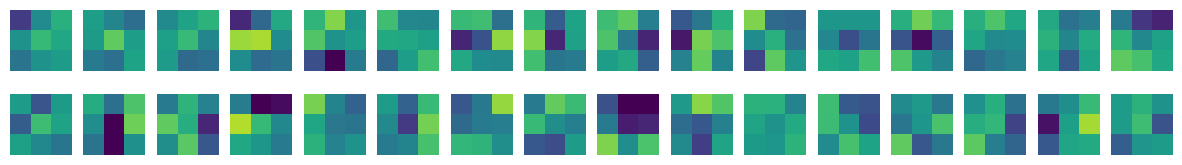

In [29]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()

In [30]:
no_training_model = keras.Sequential()

no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                                          padding='same', input_shape=(28,28,1)))

In [31]:
no_training_conv = no_training_model.layers[0]

print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [32]:
no_training_weights = no_training_conv.weights[0].numpy()

print(no_training_weights.mean(), no_training_weights.std())

0.009185931 0.08099039


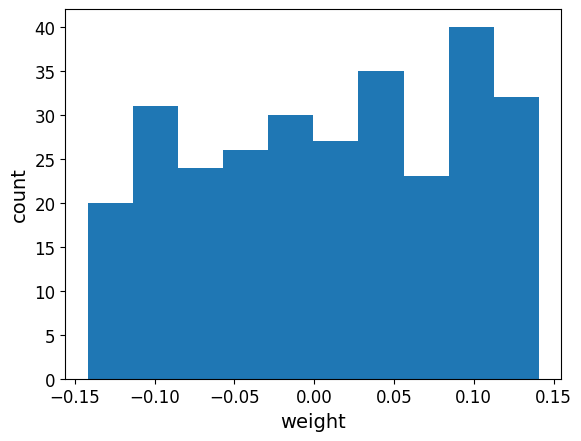

In [33]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

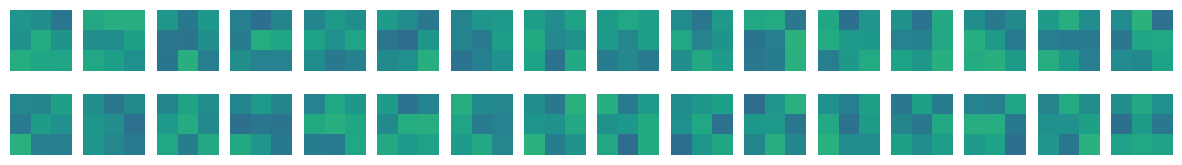

In [34]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()

In [35]:
conv_acti = keras.models.Model(model.input, model.layers[0].output)

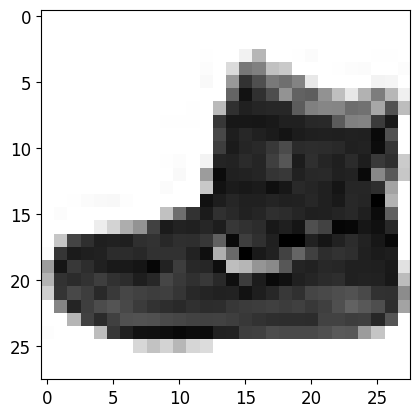

In [36]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [37]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1)/255.0
feature_maps = conv_acti.predict(inputs)
print(feature_maps.shape)

1/1 [==============================] - 0s 101ms/step
(1, 28, 28, 32)


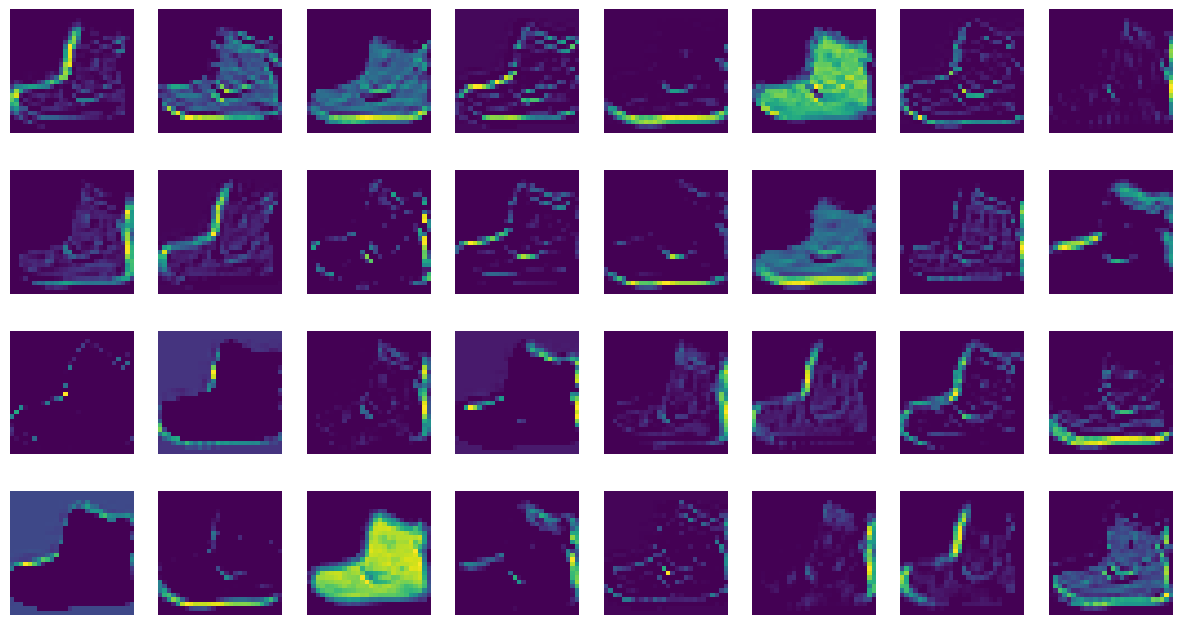

In [38]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))

for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()

1/1 [==============================] - 0s 89ms/step
(1, 14, 14, 64)


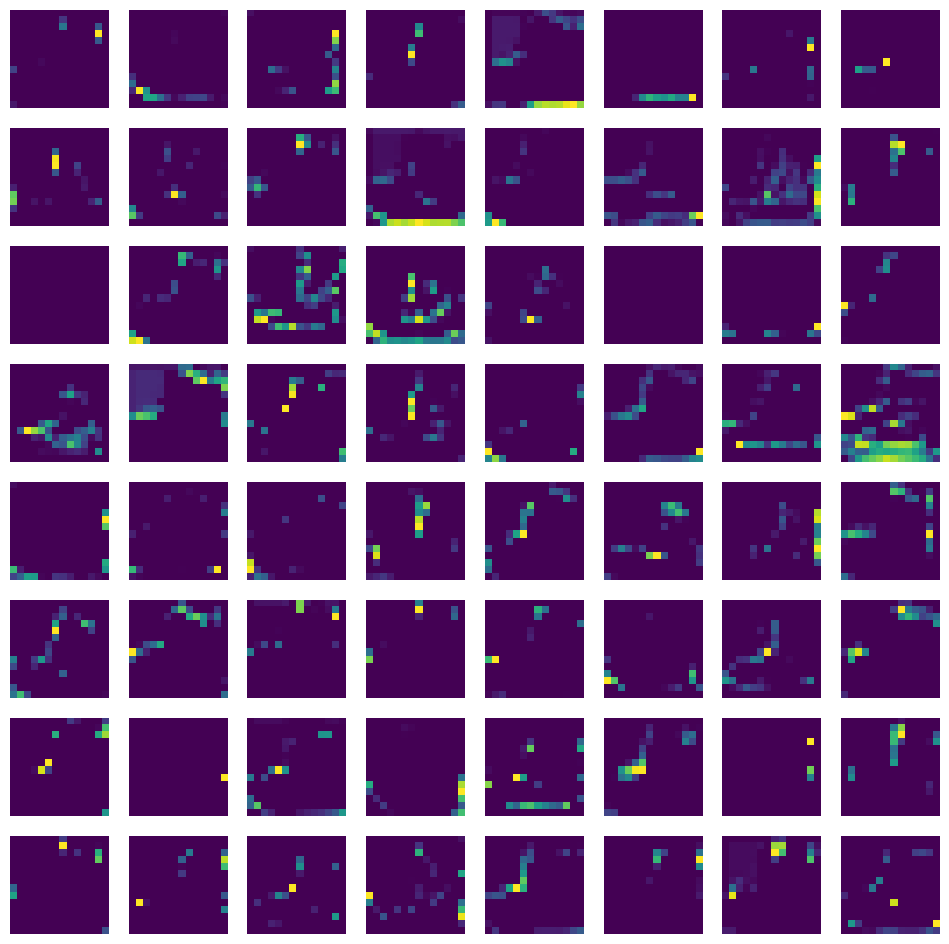

In [39]:
conv2_acti = keras.models.Model(model.input, model.layers[2].output)

feature_maps = conv2_acti.predict(train_input[0:1].reshape(-1, 28, 28, 1)/255.0)

print(feature_maps.shape)

fig, axs = plt.subplots(8, 8, figsize=(12,12))

for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()

In [40]:
!git clone https://github.com/MachineLearning2020/Homework2-Caltech101.git

Cloning into 'Homework2-Caltech101'...
remote: Enumerating objects: 9256, done.
remote: Total 9256 (delta 0), reused 0 (delta 0), pack-reused 9256
Receiving objects: 100% (9256/9256), 129.48 MiB | 21.89 MiB/s, done.
Resolving deltas: 100% (4/4), done.
Updating files: 100% (9149/9149), done.


In [55]:
caltech_dir = '/content/Homework2-Caltech101/101_ObjectCategories'
categories = ['chair', 'camera', 'butterfly', 'elephant', 'flamingo']
nb_classes = len(categories)

image_w = 64
image_h = 64
pixcels = image_w * image_h * 3

In [56]:
from PIL import Image

# 이미지를 저장하기 위한 list
X = []

# 타겟을 저장하기 위한 ㅣist
Y = []

# list를 순회할 때 index 와 value를 같이 가져오고자 하는 경우 enumerate 사용
for idx, cat in enumerate(categories):

    # 레이블 지정
    # 원 핫 인코딩을 위해서 클래스 개수 만큼의 list를 생성
    label = [0 for i in range(nb_classes)]

    # idx에 해당하는 부분에 1을 생성
    label[idx] = 1

    # 이미지 경로 설정
    image_dir = caltech_dir + "/" + cat
    files = glob.glob(image_dir+"/*.jpg")
    for i, f in enumerate(files):
        img = Image.open(f) # --- (※6)
        # 이미지의 채널을 설정 - BGR -> RGB로 변경
        img = img.convert("RGB")

        # 합성곱에 넣을 때는 이미지를 동일한 크기로 만들어야 한다.
        img = img.resize((image_w, image_h))

        # numpy 배열로 생성
        data = np.asarray(img)

        # 리스트에 이미지와 레이블 추가
        X.append(data)
        Y.append(label)

        # 출력
        if i % 10 == 0:
            print(i, "\n", data)

# 리스트의 데이터를 numpy 배열로 생성
X = np.array(X)
Y = np.array(Y)


0 
 [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
10 
 [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, Y)
xy = (X_train, X_test, y_train, y_test)

# 데이터를 다시 사용하고자 하는 경우 numpy 배열로 저장해두면 나중에 읽어올 때 편리
# numpy 파일로 저장해두고 읽으면 편리함
# data 디렉터리에 image 디렉터리 생성
np.save('./data/image/5obj.npy', xy)

In [73]:
caltech_dir = '/content/Homework2-Caltech101/101_ObjectCategories'
categories = ['chair', 'camera', 'butterfly', 'elephant', 'flamingo']
nb_classes = len(categories)

image_w = 64
image_h = 64
pixcels = image_w * image_h * 3

# 데이터 불러오기
# pickle - Serializable을 piclkedmf rkwlrh tngod
# Serializable - 객체 단위로 가져오기
X_train, X_test, y_train, y_test = np.load("./data/image/5obj.npy", allow_pickle=True)

X_train = X_train.astype("float") / 256
X_test = X_test.astype("float") / 256
print('X_train shape:', X_train.shape)

X_train shape: (250, 64, 64, 3)


In [74]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import numpy as np


caltech_dir = '/content/Homework2-Caltech101/101_ObjectCategories'
categories = ['chair', 'camera', 'butterfly', 'elephant', 'flamingo']
nb_classes = len(categories)

image_w = 64
image_h = 64
pixcels = image_w * image_h * 3

# 데이터 불러오기
# pickle - Serializable을 piclkedmf rkwlrh tngod
# Serializable - 객체 단위로 가져오기
X_train, X_test, y_train, y_test = np.load("./data/image/5obj.npy", allow_pickle=True)

X_train = X_train.astype("float") / 256
X_test = X_test.astype("float") / 256
print('X_train shape:', X_train.shape)

X_train shape: (250, 64, 64, 3)


In [80]:
model = Sequential()

print(X_train.shape[1:])

# 입력 층을 합성 곱으로 생성
# 커널의 개수는 32개 커널의 크기는 3 * 3 제로 패딩 사용
model.add(Convolution2D(32, kernel_size=3, padding='same',input_shape=(64,64,3)))
model.add(Activation('relu'))

# 특성 맵의 크기가 줄어 듦
model.add(MaxPooling2D(2))

# 뉴런은 25% 를 제거
model.add(Dropout(0.25))

#
model.add(Convolution2D(64, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(Convolution2D(64, 3, 3))
model.add(MaxPooling2D(2))
model.add(Dropout(0.25))

# 완전 연결층 - 입력의 크기를 1차원으로
model.add(Flatten()) # --- (※3)
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# 출력 층 생성 - 뉴런의 개수가 1 또는 클래스 개수
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

(64, 64, 3)


In [82]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# 모델 훈련하기 --- (※4)
hdf5_file = "./data/image/5obj-model.hdf5"
if os.path.exists(hdf5_file):
    model.load_weights(hdf5_file)
else:
    model.fit(X_train, y_train, batch_size=32, epochs=50)
    model.save_weights(hdf5_file)

# 모델 평가하기--- (※5)
score = model.evaluate(X_test, y_test)
print('loss=', score[0])
print('accuracy=', score[1])

3/3 [==============================] - 1s 14ms/step - loss: 0.1161 - accuracy: 0.9524
loss= 0.11609801650047302
accuracy= 0.9523809552192688


In [83]:
img = Image.open('/content/drive/MyDrive/CNN_Practice/chair.png')
img = img.convert("RGB")
img = img.resize((image_w, image_h))
data = np.asarray(img)
data = data.astype("float") / 256
data = data.reshape(-1, 64, 64, 3)
score = model.predict(data)
print(score)
for category, prob in enumerate(zip(categories, score[0])):
    print(category, prob)


1/1 [==============================] - 0s 74ms/step
[[1.5034249e-01 8.5864682e-05 1.8447579e-06 4.6845904e-12 8.4956980e-01]]
0 ('chair', 0.1503425)
1 ('camera', 8.586468e-05)
2 ('butterfly', 1.8447579e-06)
3 ('elephant', 4.6845904e-12)
4 ('flamingo', 0.8495698)
